Transformer

In [3]:
#imports
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Data preparation
df = pd.read_csv('../../data/data_preparation/subsets/subset1_cleaned.csv')

seq_len = 10
data = np.cumsum(np.random.randn(seq_len, 2), axis=0)  # random walk
input_seq = torch.tensor(data[:-1], dtype=torch.float32).unsqueeze(1)  # (seq_len-1, batch, features)
target_seq = torch.tensor(data[1:], dtype=torch.float32).unsqueeze(1)  # (seq_len-1, batch, features)

In [5]:
#Model Definition
class TrajectoryTransformer(nn.Module):
    def __init__(self, input_dim=2, model_dim=32, num_layers=2, num_heads=2):
        super().__init__()
        self.input_fc = nn.Linear(input_dim, model_dim)
        self.transformer = nn.Transformer(
            d_model=model_dim, nhead=num_heads, num_encoder_layers=num_layers, num_decoder_layers=num_layers
        )
        self.output_fc = nn.Linear(model_dim, input_dim)

    def forward(self, src, tgt):
        src = self.input_fc(src)
        tgt = self.input_fc(tgt)
        out = self.transformer(src, tgt)
        return self.output_fc(out)

In [6]:
#Training
model = TrajectoryTransformer()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

epochs = 10
for epoch in range(epochs):
    optimizer.zero_grad()
    # Teacher forcing: use input_seq as both src and tgt (shifted by one)
    output = model(input_seq, input_seq)
    loss = loss_fn(output, target_seq)
    loss.backward()
    optimizer.step()
    if epoch % 2 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

C:\Users\pedro\AppData\Roaming\Python\Python312\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 0, Loss: 4.8369
Epoch 2, Loss: 0.9326
Epoch 4, Loss: 0.7187
Epoch 6, Loss: 0.6216
Epoch 8, Loss: 0.5716


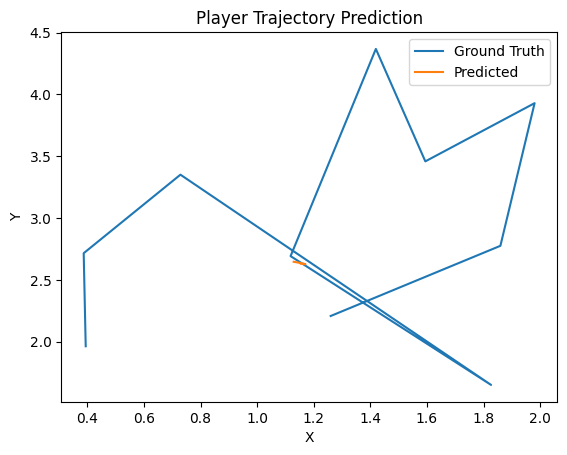

In [7]:
#Prediction and Visualization
model.eval()
with torch.no_grad():
    pred = model(input_seq, input_seq).squeeze(1).numpy()

plt.plot(data[:, 0], data[:, 1], label="Ground Truth")
plt.plot(pred[:, 0], pred[:, 1], label="Predicted")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Player Trajectory Prediction")
plt.show()